<a href="https://colab.research.google.com/github/tushar12345/Data-Science-Projects/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Tensor flow version 2 includes keras
%tensorflow_version 2.x

In [0]:
#Import the following libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam , SGD, Adadelta, RMSprop
from tensorflow.keras.models import model_from_json


from matplotlib import pyplot as plt

import numpy as np

In [0]:
#Create a simple polynomial function that our model will learn as follows:
        def function(x):
            return 10*x**2 - 5*x - 0.5

In [18]:
#Use the following snippet to generate random test data:
x_train = np.random.rand(10000)
print(x_train.shape)
y_train = function(x_train)
print(y_train.shape)
x_test = np.linspace(0, 1, 100)
y_test = function(x_test)
print("Test data shape")
print(x_test.shape)
print(y_test.shape)

(10000,)
(10000,)
Test data shape
(100,)
(100,)


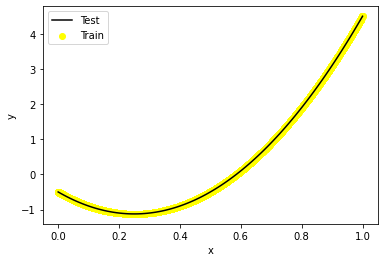

In [21]:
#Visualize the data set using the snippet below:
        plt.scatter(x_train, y_train, label='Train', color='yellow')
        plt.plot(x_test, y_test, label='Test', color='black')
        plt.ylabel('y')
        plt.xlabel('x')
        plt.legend(loc='best')
        plt.show()

In [0]:
#Define a basic sequential model as follows:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
# Add a dense layer with 20 units
# Add a 'relu' activation layer
# Add an output dense layer with 1 unit
model.add(Dense(units=20, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=1))


In [0]:
#Compile the model with a 'mean_squared_error' loss function and the Adam optimizer.
model.compile(loss='mean_squared_error', optimizer=RMSprop())


In [69]:
history = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6323 - val_loss: 0.0217
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0072
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0053
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0185
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0040
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0058
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0033
Epoch 8/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 9/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0187
Epoch 10/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0018

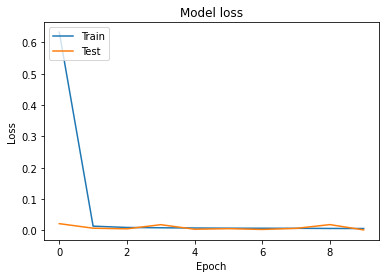

In [70]:
        #print(history.history['loss'])
        #print(history.history['val_loss'])

#Plot the model train and validation loss:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

In [0]:
#Make predictions using the test data
y_predictions = model.predict(x_test)

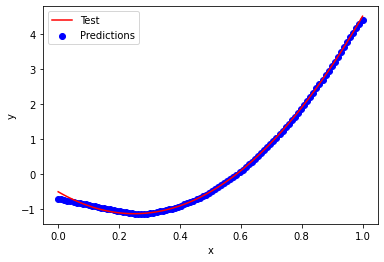

In [73]:
#Plot the predicted results and compare with the ground truth:
        plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
        plt.plot(x_test, y_test, label='Test', color='red')
        plt.ylabel('y')
        plt.xlabel('x')
        plt.legend(loc='best')
        plt.show()

In [0]:
#Save the Model
#The model structure and trained weights/biases can be saved to files. These can be reloaded later for prediction.
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")

In [0]:
#Restore the 
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("weights.h5")

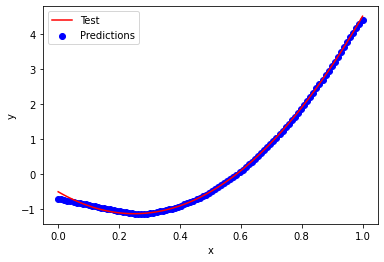

In [81]:
#Make predictions using the restored model. It should produce the same results as the original model.
y_predictions = restored_model.predict(x_test, batch_size=1)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()